# Basic Data Analysis


This exercise uses **Singapore Residents** data from Kaggle https://www.kaggle.com/mohitmaithani/singapore-resident-dataset.
* singapore_population.csv

Import libraries `pandas` and `matplotlib.pyplot`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Singapore Population Data

In [3]:
df = pd.read_csv('data/singapore_population.csv')
df.shape

(9600, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             9600 non-null   int64 
 1   ethnicity group  9600 non-null   object
 2   gender           9600 non-null   object
 3   age              9600 non-null   object
 4   population       9600 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 375.1+ KB


### Question: What's Singapore population in year 2015?

In [57]:
df1 = df.groupby('year')['population'].sum()
df1.head()

year
1957    1502203
1958    1552500
1959    1622900
1960    1683900
1961    1741200
Name: population, dtype: int64

In [58]:
df1.loc[2015]

4907802

### Question: Use line graph to show change in Singapore population over the years 

<AxesSubplot:xlabel='year'>

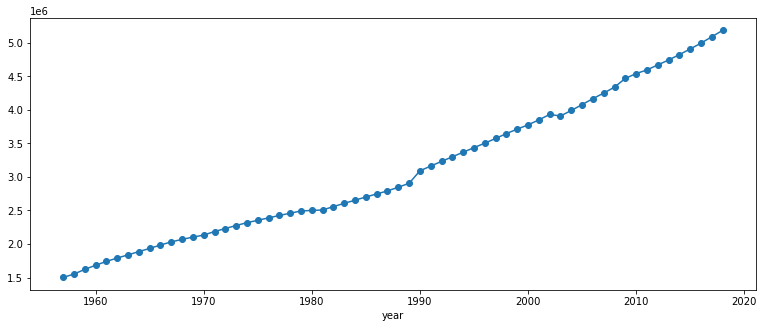

In [74]:
df1.plot(x='year', marker='o', figsize=(13,5))

### Question: Distribution of Singapore population by age groups in 2015

Find all records related to year 2015.

In [18]:
df2015 = df[ df['year']==2015 ]
df2015.head()

,year,ethnicity group,gender,age,population
8896,2015,malays,male,0 - 4,16276
8897,2015,malays,male,5 - 9,16575
8898,2015,malays,male,10 - 14,19016
8899,2015,malays,male,15 - 19,22504
8900,2015,malays,male,20 - 24,25006


In [60]:
summary = df2015.groupby('age')['population'].sum()
summary

age
0  -  4     183575
10 - 14     214388
15 - 19     242902
20 - 24     264127
25 - 29     271030
30 - 34     290619
35 - 39     301067
40 - 44     316755
45 - 49     303413
5  -  9     204452
50 - 54     315091
55 - 59     295063
60 - 64     240493
65 - 69     182425
65 - 85     459715
70 - 74     102631
70 - 85     277290
75 - 79      81211
75 - 85     174659
80 - 84      93448
80 - 84      51785
85           41663
Name: population, dtype: int64

<AxesSubplot:title={'center':'Population by Age Group (2015)'}, ylabel='age'>

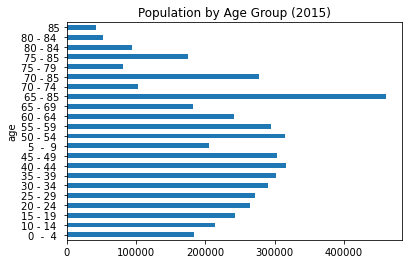

In [61]:
summary.plot(kind='barh', x='age', y='population', title='Population by Age Group (2015)')

### Question: Percentage of male and female population in 2015.

In [47]:
summary = df2015.groupby('gender')['population'].sum()
summary

gender
female    2558805
male      2348997
Name: population, dtype: int64

<AxesSubplot:title={'center':'Singapore Population 2015'}, ylabel='population'>

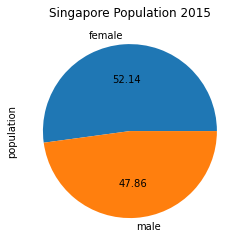

In [48]:
summary.plot(kind='pie', y='population', autopct='%.2f', title='Singapore Population 2015')

### Question: Distribution of population by race in 2015

In [49]:
df2015

,year,ethnicity group,gender,age,population
8896,2015,malays,male,0 - 4,16276
8897,2015,malays,male,5 - 9,16575
8898,2015,malays,male,10 - 14,19016
8899,2015,malays,male,15 - 19,22504
8900,2015,malays,male,20 - 24,25006
...,...,...,...,...,...
9067,2015,Other Ethnic Groups,female,65 - 85,2901
9068,2015,Other Ethnic Groups,female,70 - 85,1800
9069,2015,Other Ethnic Groups,female,75 - 85,1279
9070,2015,Other Ethnic Groups,female,80 - 84,767


In [64]:
summary = df2015.groupby('ethnicity group')['population'].sum()
summary

ethnicity group
Other Ethnic Groups     140182
chinese                3746225
indians                 413513
malays                  607882
Name: population, dtype: int64

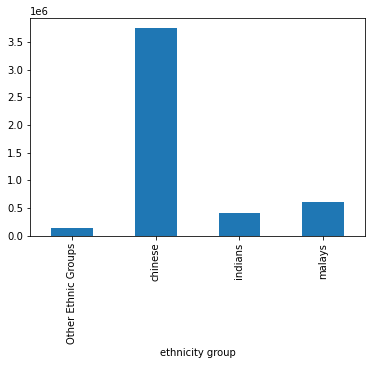

In [68]:
ax = summary.plot(kind='bar')

### Question: Change in population of each ethnic group over the years.

In [81]:
gp = df.groupby(['ethnicity group', 'year'])

In [82]:
summary = gp.sum()['population']
summary

ethnicity group      year
Other Ethnic Groups  1957     35976
                     1958     30000
                     1959     30800
                     1960     30300
                     1961     30300
                              ...  
malays               2014    599863
                     2015    607882
                     2016    616566
                     2017    626221
                     2018    636807
Name: population, Length: 248, dtype: int64

In [90]:
summary2 = summary.unstack('ethnicity group')
summary2.head()

ethnicity group,Other Ethnic Groups,chinese,indians,malays
year,,,,
1957,35976,1137408,125912,202907
1958,30000,1178100,132400,212000
1959,30800,1235500,133000,223600
1960,30300,1284000,134400,235200
1961,30300,1328500,136900,245500


<AxesSubplot:xlabel='year'>

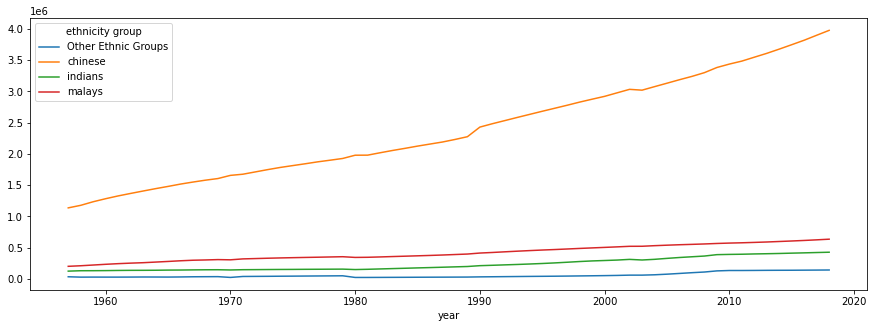

In [92]:
summary2.plot(figsize=(15,5))